In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("/content/daily_btc_1.csv")

In [4]:
# Display the first few rows
data.head()


,Date,Open,High,Low,Close
0,12/31/2022,"16,576","16,634","16,541","16,549"
1,12/31/2021,"47,239","48,564","45,715","46,322"
2,12/31/2020,"28,898","29,298","27,989","28,966"
3,12/31/2019,"7,254","7,309","7,132","7,171"
4,12/31/2018,"3,859","3,888","3,697","3,721"


In [5]:
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [8]:
# Convert price columns to numeric values
price_columns = ['Open', 'High', 'Low', 'Close']
data[price_columns] = data[price_columns].apply(lambda x: x.str.replace(',', '').astype(float))

# Split the data into pre and post COVID
covid_start_date = pd.to_datetime('2020-03-11')
pre_covid_data = data[data['Date'] < covid_start_date]
post_covid_data = data[data['Date'] >= covid_start_date]

# Display the first few rows of each dataset
pre_covid_data.head(), post_covid_data.head()


(         Date     Open     High      Low    Close  Year
 3  2019-12-31   7254.0   7309.0   7132.0   7171.0     3
 4  2018-12-31   3859.0   3888.0   3697.0   3721.0     4
 5  2017-12-31  12995.0  14213.0  12497.0  14003.0     5
 9  2019-12-30   7402.0   7430.0   7217.0   7254.0     3
 10 2018-12-30   3963.0   3971.0   3744.0   3859.0     4,
         Date     Open     High      Low    Close  Year
 0 2022-12-31  16576.0  16634.0  16541.0  16549.0     0
 1 2021-12-31  47239.0  48564.0  45715.0  46322.0     1
 2 2020-12-31  28898.0  29298.0  27989.0  28966.0     2
 6 2022-12-30  16599.0  16644.0  16340.0  16576.0     0
 7 2021-12-30  47233.0  47893.0  46019.0  47239.0     1)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose



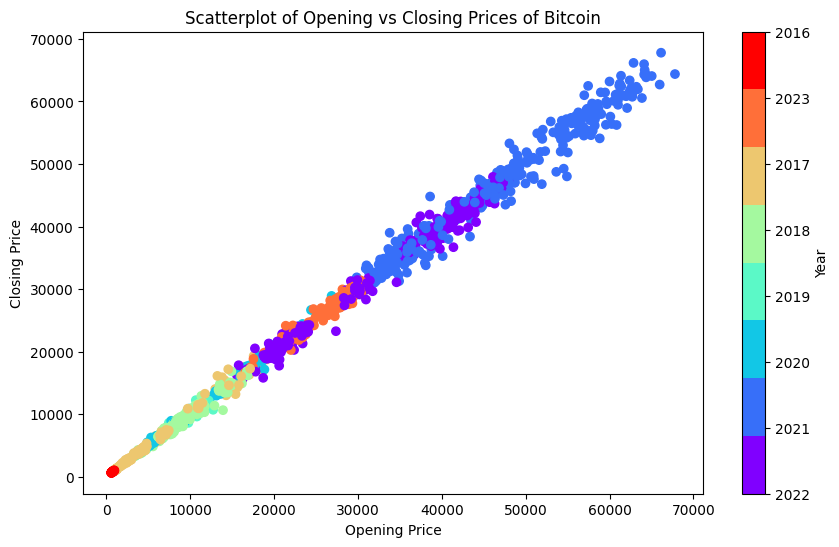

In [10]:

#SCATTERPLOT FOR BTC PRICE OVER THE YEAR


# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a numeric representation for 'Year'
data['Year'] = data['Date'].dt.year

# Assign a unique numeric value to each year
unique_years = data['Year'].unique()
year_mapping = {year: i for i, year in enumerate(unique_years)}

# Map the 'Year' column to the numeric representation
data['Year'] = data['Year'].map(year_mapping)

# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Create a colormap
cmap = plt.get_cmap('rainbow', len(unique_years))

# Create a scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data=data.reset_index(), x="Open", y="Close", c="Year", cmap=cmap)
plt.title('Scatterplot of Opening vs Closing Prices of Bitcoin')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')

# Add a colorbar
cbar = plt.colorbar(scatter, ticks=np.arange(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticklabels(unique_years.astype(int))

plt.show()


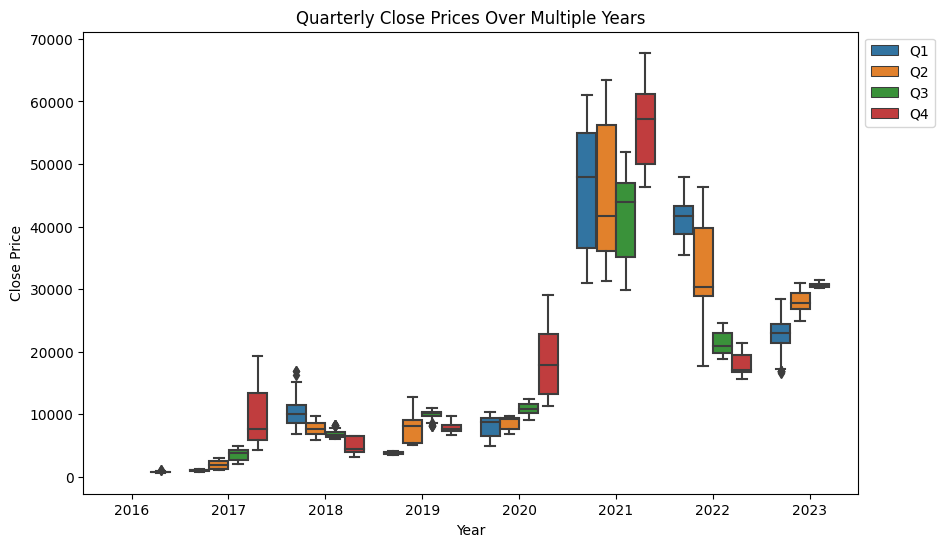

In [14]:
# Boxplots for ‘Monthly Close Prices over Multiple Years’

# # Create a new dataframe with necessary columns for boxplot
# boxplot_data = data.reset_index()[['Date', 'Close']]
# boxplot_data['Year'] = boxplot_data['Date'].dt.year
# boxplot_data['Month'] = boxplot_data['Date'].dt.month_name()

# # Order the months properly
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# boxplot_data['Month'] = pd.Categorical(boxplot_data['Month'], categories=month_order, ordered=True)

# # Create the boxplots
# plt.figure(figsize=(14,8))
# sns.boxplot(data=boxplot_data, x='Year', y='Close', hue='Month')
# plt.title('Monthly Close Prices Over Multiple Years')
# plt.xlabel('Year')
# plt.ylabel('Close Price')
# plt.legend(bbox_to_anchor=(1, 1), loc=2)
# plt.show()

# # # Boxplots for 'Monthly Close Prices over Multiple Years'

# # # Create a new dataframe with necessary columns for boxplot
# # boxplot_data = data.reset_index()[['Date', 'Close']]
# # boxplot_data['Year'] = boxplot_data['Date'].dt.year
# # boxplot_data['Month'] = boxplot_data['Date'].dt.month_name()

# # # Order the months properly
# # month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# # boxplot_data['Month'] = pd.Categorical(boxplot_data['Month'], categories=month_order, ordered=True)

# # # Create the boxplots
# # plt.figure(figsize=(14, 8))
# # sns.boxplot(data=boxplot_data, x='Month', y='Close', hue='Year')
# # plt.title('Monthly Close Prices Over Multiple Years')
# # plt.xlabel('Month')
# # plt.ylabel('Close Price')
# # plt.legend(bbox_to_anchor=(1, 1), loc=2)
# # plt.show()
# Boxplots for 'Quarterly Close Prices over Multiple Years'

# # Create a new dataframe with necessary columns for boxplot
# boxplot_data = data.reset_index()[['Date', 'Close']]
# boxplot_data['Year'] = boxplot_data['Date'].dt.year
# boxplot_data['Quarter'] = boxplot_data['Date'].dt.quarter

# # Map quarter numbers to quarter names
# quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
# boxplot_data['Quarter'] = boxplot_data['Quarter'].map(quarter_mapping)

# # Order the quarters properly
# quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
# boxplot_data['Quarter'] = pd.Categorical(boxplot_data['Quarter'], categories=quarter_order, ordered=True)

# # Create the boxplots
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=boxplot_data, x='Quarter', y='Close', hue='Year')
# plt.title('Quarterly Close Prices Over Multiple Years')
# plt.xlabel('Quarter')
# plt.ylabel('Close Price')
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.show()


# Boxplots for 'Quarterly Close Prices over Multiple Years'

# Create a new dataframe with necessary columns for boxplot
boxplot_data = data.reset_index()[['Date', 'Close']]
boxplot_data['Year'] = boxplot_data['Date'].dt.year
boxplot_data['Quarter'] = boxplot_data['Date'].dt.quarter

# Map quarter numbers to quarter names
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
boxplot_data['Quarter'] = boxplot_data['Quarter'].map(quarter_mapping)

# Order the quarters properly
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
boxplot_data['Quarter'] = pd.Categorical(boxplot_data['Quarter'], categories=quarter_order, ordered=True)

# Create the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data, x='Year', y='Close', hue='Quarter')
plt.title('Quarterly Close Prices Over Multiple Years')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

